# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

In [1]:

# Cargar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Cargar los datos
taxi_data = pd.read_csv('taxi.csv')



C:\Users\mm131\AppData\Local\Temp\ipykernel_25520\3785102524.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  taxi_data_hourly = taxi_data.resample('H').sum()


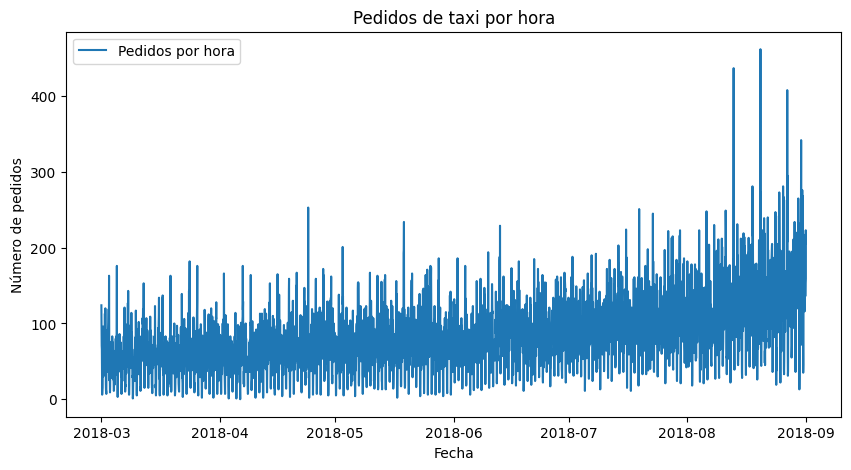

In [2]:

# Convertir la columna 'datetime' a tipo datetime y establecerla como índice
taxi_data['datetime'] = pd.to_datetime(taxi_data['datetime'])
taxi_data.set_index('datetime', inplace=True)

# Remuestrear los datos en intervalos de una hora
taxi_data_hourly = taxi_data.resample('H').sum()

# Visualización inicial de la serie temporal
plt.figure(figsize=(10, 5))
plt.plot(taxi_data_hourly.index, taxi_data_hourly['num_orders'], label='Pedidos por hora')
plt.xlabel('Fecha')
plt.ylabel('Número de pedidos')
plt.title('Pedidos de taxi por hora')
plt.legend()
plt.show()

In [3]:

# Dividir los datos en entrenamiento y prueba (90% - 10%)
train_data, test_data = train_test_split(taxi_data_hourly, test_size=0.1, shuffle=False)

# Separar características y etiquetas
X_train = np.array(range(len(train_data))).reshape(-1, 1)
y_train = train_data['num_orders'].values
X_test = np.array(range(len(train_data), len(train_data) + len(test_data))).reshape(-1, 1)
y_test = test_data['num_orders'].values




In [4]:
# Entrenar diferentes modelos y evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, predictions))
    results[model_name] = rmse

# Resultados de la métrica RMSE
results

{'Linear Regression': 64.36020595670732, 'Random Forest': 63.776695799871305}

In [5]:

# Mostrar el mejor modelo según la métrica RMSE
best_model = min(results, key=results.get)
print(f"El mejor modelo fue {best_model} con un RMSE de {results[best_model]:.2f} en el conjunto de prueba.")


El mejor modelo fue Random Forest con un RMSE de 63.78 en el conjunto de prueba.
